Pract1 : Feature Transformation: Apply LDA Algorithm on Iris Dataset
and classify which species a given flower belongs to. Dataset
Link: https://www.kaggle.com/datasets/uciml/iris

In [ ]:
import os
import zipfile

# Download the dataset
os.system('kaggle datasets download -d uciml/iris')

# Unzip the dataset
with zipfile.ZipFile('iris.zip', 'r') as zip_ref:
    zip_ref.extractall('your_target_directory')  # Specify target directory


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

iris = pd.read_csv('/content/your_target_directory/Iris.csv')
# Inspect the dataset
print(iris.head())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Split dataset into features and target variable
iris.drop(columns=["Id"], inplace = True)
X = iris.drop(columns=['Species'])  # Features: all except species
y = iris['Species']  # Target: species column

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Apply LDA to reduce dimensionality
lda = LDA(n_components = 2)  # You can choose 1, 2, or 3 components based on your preference
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Train a Logistic Regression model on the reduced data
log_reg = LogisticRegression()
log_reg.fit(X_train_lda, y_train)



LogisticRegression()

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


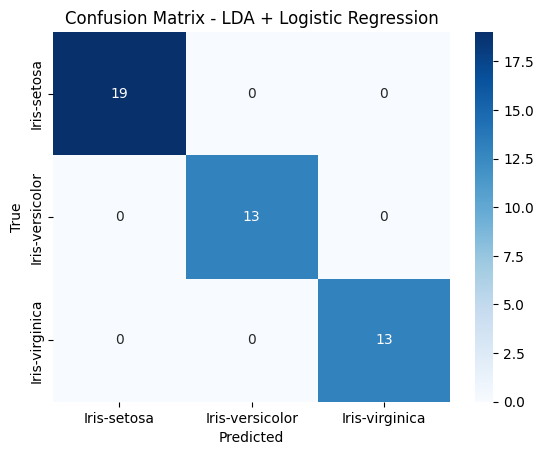

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = iris['Species'].unique(), yticklabels = iris['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LDA + Logistic Regression')
plt.show()